In [2]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 37.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [5]:
!pip install statsmodels

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
from scipy.stats import ttest_1samp, chi2_contingency
from statsmodels.stats.weightstats import ztest

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salahuddinahmedshuvo/student-mental-stress-and-coping-mechanisms")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/salahuddinahmedshuvo/student-mental-stress-and-coping-mechanisms/versions/1


In [26]:
ls /root/.cache/kagglehub/datasets/salahuddinahmedshuvo/student-mental-stress-and-coping-mechanisms/versions/1

Student_Mental_Stress_and_Coping_Mechanisms.csv


In [27]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/salahuddinahmedshuvo/student-mental-stress-and-coping-mechanisms/versions/1/Student_Mental_Stress_and_Coping_Mechanisms.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())  # Check for missing values

    Student ID  Age  Gender  Academic Performance (GPA)  Study Hours Per Week  \
0  802-17-3671   22  Female                           2                     9   
1  871-12-8572   25  Female                           0                    28   
2  495-13-2672   24  Female                           0                    45   
3  365-77-2496   20    Male                           2                     8   
4  664-76-5622   28    Male                           0                    14   

   Social Media Usage (Hours per day)  Sleep Duration (Hours per night)  \
0                                   2                                12   
1                                   0                                 6   
2                                   3                                12   
3                                   7                                 7   
4                                   6                                 8   

   Physical Exercise (Hours per week)  Family Support    Finan

In [28]:
df.dropna(inplace=True)  # Remove rows with missing values

In [29]:
df.head()

,Student ID,Age,Gender,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use
0,802-17-3671,22,Female,2,9,2,12,2,1,1,3,5,9,No,1,Walking or Nature Walks,4,No,Yes,1
1,871-12-8572,25,Female,0,28,0,6,0,1,1,1,2,9,Yes,3,Meditation,2,Yes,No,1
2,495-13-2672,24,Female,0,45,3,12,10,3,3,1,4,9,Yes,5,Reading,1,Yes,Yes,3
3,365-77-2496,20,Male,2,8,7,7,4,1,3,2,5,1,No,1,Social Media Engagement,2,Yes,No,4
4,664-76-5622,28,Male,0,14,6,8,1,2,4,4,2,7,Yes,1,Exercise,1,Yes,No,3


In [30]:
df = df.drop(columns=["Stress Coping Mechanisms"])
df.head()

,Student ID,Age,Gender,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Counseling Attendance,Diet Quality,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use
0,802-17-3671,22,Female,2,9,2,12,2,1,1,3,5,9,No,1,4,No,Yes,1
1,871-12-8572,25,Female,0,28,0,6,0,1,1,1,2,9,Yes,3,2,Yes,No,1
2,495-13-2672,24,Female,0,45,3,12,10,3,3,1,4,9,Yes,5,1,Yes,Yes,3
3,365-77-2496,20,Male,2,8,7,7,4,1,3,2,5,1,No,1,2,Yes,No,4
4,664-76-5622,28,Male,0,14,6,8,1,2,4,4,2,7,Yes,1,1,Yes,No,3


In [31]:
df["Family Mental Health History"] = df["Family Mental Health History"].map({"Yes": 1, "No": 0})
df["Medical Condition"] = df["Medical Condition"].map({"Yes": 1, "No": 0})
df["Counseling Attendance"] = df["Counseling Attendance"].map({"Yes": 1, "No": 0})
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df

,Student ID,Age,Gender,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Counseling Attendance,Diet Quality,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use
0,802-17-3671,22,0.0,2,9,2,12,2,1,1,3,5,9,0,1,4,0,1,1
1,871-12-8572,25,0.0,0,28,0,6,0,1,1,1,2,9,1,3,2,1,0,1
2,495-13-2672,24,0.0,0,45,3,12,10,3,3,1,4,9,1,5,1,1,1,3
3,365-77-2496,20,1.0,2,8,7,7,4,1,3,2,5,1,0,1,2,1,0,4
4,664-76-5622,28,1.0,0,14,6,8,1,2,4,4,2,7,1,1,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,826-89-7993,24,NaN,2,50,4,11,8,5,2,4,5,2,1,1,3,1,0,2
756,681-15-6754,23,0.0,3,5,6,12,7,1,4,2,1,1,1,2,4,1,0,1
757,714-33-5373,23,1.0,1,17,3,11,5,2,4,3,3,9,1,5,4,1,0,3
758,849-54-1252,29,0.0,1,15,8,10,4,2,1,2,2,2,0,4,4,0,1,3


In [33]:
df.dropna()

,Student ID,Age,Gender,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Counseling Attendance,Diet Quality,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use
0,802-17-3671,22,0.0,2,9,2,12,2,1,1,3,5,9,0,1,4,0,1,1
1,871-12-8572,25,0.0,0,28,0,6,0,1,1,1,2,9,1,3,2,1,0,1
2,495-13-2672,24,0.0,0,45,3,12,10,3,3,1,4,9,1,5,1,1,1,3
3,365-77-2496,20,1.0,2,8,7,7,4,1,3,2,5,1,0,1,2,1,0,4
4,664-76-5622,28,1.0,0,14,6,8,1,2,4,4,2,7,1,1,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,836-77-4994,19,1.0,4,7,6,7,8,2,1,1,3,5,1,2,1,0,0,4
756,681-15-6754,23,0.0,3,5,6,12,7,1,4,2,1,1,1,2,4,1,0,1
757,714-33-5373,23,1.0,1,17,3,11,5,2,4,3,3,9,1,5,4,1,0,3
758,849-54-1252,29,0.0,1,15,8,10,4,2,1,2,2,2,0,4,4,0,1,3


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Student ID                          760 non-null    object 
 1   Age                                 760 non-null    int64  
 2   Gender                              689 non-null    float64
 3   Academic Performance (GPA)          760 non-null    int64  
 4   Study Hours Per Week                760 non-null    int64  
 5   Social Media Usage (Hours per day)  760 non-null    int64  
 6   Sleep Duration (Hours per night)    760 non-null    int64  
 7   Physical Exercise (Hours per week)  760 non-null    int64  
 8   Family Support                      760 non-null    int64  
 9   Financial Stress                    760 non-null    int64  
 10  Peer Pressure                       760 non-null    int64  
 11  Relationship Stress                 760 non-n

In [35]:
X = df.drop(columns=['Mental Stress Level', 'Student ID'])  # Features
y = df['Mental Stress Level']  # Target variable


In [36]:
y_binary = np.where(y > y.median(), 1, 0)  # Categorizing stress as High (1) / Low (0)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [40]:
from sklearn.impute import SimpleImputer # import SimpleImputer from sklearn.impute

imputer = SimpleImputer(strategy='mean')

In [41]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [44]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [45]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.2f}")
    print("\n")

evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")

Evaluation for Logistic Regression:
Accuracy: 0.49
Precision: 0.45
Recall: 0.41
F1-score: 0.43


Evaluation for Random Forest:
Accuracy: 0.54
Precision: 0.50
Recall: 0.43
F1-score: 0.46


Evaluation for SVM:
Accuracy: 0.47
Precision: 0.42
Recall: 0.44
F1-score: 0.43




In [46]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance.head(3))  # Top 3 most important features

                              Feature  Importance
3                Study Hours Per Week    0.134947
6  Physical Exercise (Hours per week)    0.089434
0                                 Age    0.081371


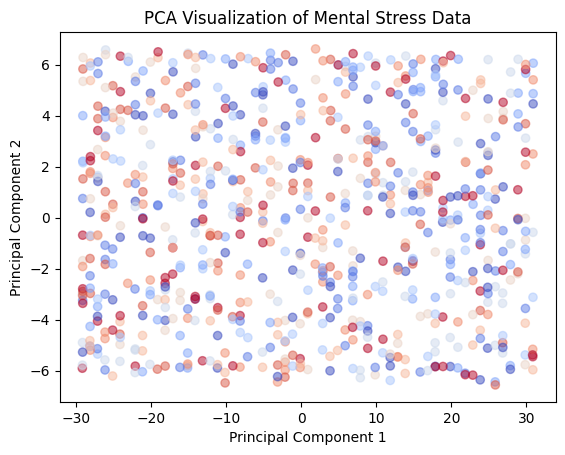

In [48]:
pca = PCA(n_components=2)
# Impute missing values in X before applying PCA
X_imputed = imputer.fit_transform(X) # Use the same imputer you used for X_train, X_test

# Now use the imputed data for PCA
X_pca = pca.fit_transform(X_imputed)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Mental Stress Data")
plt.show()

In [49]:
t_stat, p_value = ttest_1samp(y, 5)
print(f"T-test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Student mental stress levels significantly differ from 5.")
else:
    print("Fail to reject the null hypothesis: No significant difference in student mental stress levels from 5.")

T-test p-value: 0.0006
Reject the null hypothesis: Student mental stress levels significantly differ from 5.


In [50]:
students_with_counseling = df[df["Counseling Attendance"] == 1]["Study Hours Per Week"]
students_without_counseling = df[df["Counseling Attendance"] == 0]["Study Hours Per Week"]

z_stat, p_value = ztest(students_with_counseling, students_without_counseling)
print(f"Z-test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in study hours between students who attended counseling and those who did not.")
else:
    print("No significant difference in study hours based on counseling attendance.")

Z-test p-value: 0.2395
No significant difference in study hours based on counseling attendance.


In [51]:
contingency_table = pd.crosstab(df['Gender'], df['Counseling Attendance'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant relationship between gender and counseling attendance.")
else:
    print("No significant relationship between gender and counseling attendance.")

Chi-square test p-value: 0.9187
No significant relationship between gender and counseling attendance.
